# Different Usage Patterns of FordGo Bike Service
## by Syed M Kamran

## Investigation Overview

In this investigation, I wanted to look at difference charteristics and how usage of bikes vary accross different Months, years, and Days. Furthermore, I've also investigated the relations between two user types and their bike riding patterns also popular start and end stations.

## Dataset Overview

This dataset contains the information about each individual trip made in FordGo Bike sharing system for the years 2017 and 2018. It includes 2371650 bike trips and 13 features (after cleaning). Following are the main and important features of the dataset. <br/>
- Start Time, End Time, and Total Duration of the trip.<br/>
- Start and end stations information like id,name, map coordinates.<br/>
- Type of user. (“Subscriber” = Member or “Customer” = Casual).<br/>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
path = r'C:\Users\Kami\Downloads\UDACITY\Data Analyst NanoDegree\Project 5 Data Visualization\cleaned-fordgobike.csv'
df_clean = pd.read_csv(path)


In [8]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

In [9]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
dtype: object

## Bike Usage By Month

Overall, Demands for Ford Go Bikes are very high in October, followed by September then August. We can also see increase in trend starting from January, going all the way to the October, then there is a decrease in demands for bikes in November and December.

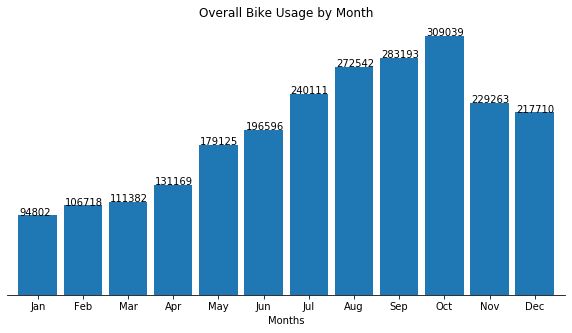

In [19]:
months = df_clean.start_time.dt.month.value_counts().sort_index()
plot = months.plot(kind='bar',figsize=(10,5),width=0.85)
plt.xticks(np.arange(0,12,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation = 0);
x=0
for month in months:
    plt.text(x-0.4,month,month)
    x += 1
plt.xlabel('Months')    
#plt.ylabel('No of trips') 
plt.title('Overall Bike Usage by Month');
plt.yticks([])
plot.spines['left'].set_visible(False)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)

## Bike Usage By Day of The Week
By analyzing the usage of the bikes by the day of the week, we can conclude most users use bikes on weekdays than on weekends. Pie chart represents percentage of people using bikes on weekdays is much greater (around 82%) than people using on weekends i.e. just around 18%. This may suggests, most of the people use Ford Go Bikes for commuting to their offices or workplace.

Percentage of people using bikes on weekdays = 82.19%
Percentage of people using bikes on weekends = 17.81%


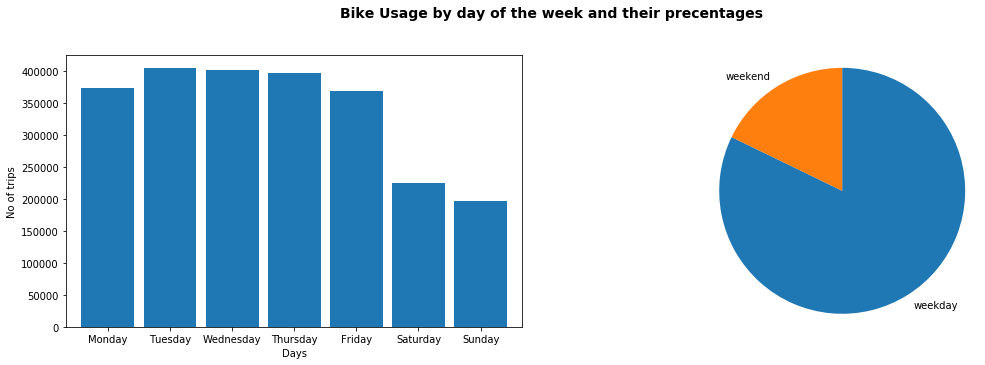

In [36]:
plt.figure(figsize=[10, 6]);
plt.subplot(1, 2, 1);
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean.start_time.dt.day_name().value_counts().sort_index().reindex(days).plot(kind='bar',figsize=(18,5),width=0.85);
plt.xticks(rotation = 0);
plt.xlabel('Days')
plt.ylabel('No of trips')
#plt.title('Bike Usage By Day of the Week');


plt.subplot(1, 2, 2);
weekday_count = df_clean.start_time.dt.day_name().value_counts().sort_index().reindex(days).iloc[0:5].sum()
weekend_count = df_clean.start_time.dt.day_name().value_counts().sort_index().reindex(days).iloc[-2:].sum()
total_count = df_clean.start_time.dt.day_name().value_counts().sort_index().reindex(days).sum()

weekday_percent = ((weekday_count/total_count) * 100) 
weekend_percent = ((weekend_count/total_count) * 100) 

print('Percentage of people using bikes on weekdays = {:.2f}%'.format(weekday_percent))
print('Percentage of people using bikes on weekends = {:.2f}%'.format(weekend_percent))

plt.pie([weekday_percent,weekend_percent],labels=['weekday','weekend'],startangle=90,counterclock = False)
plt.axis('square');
plt.suptitle('Bike Usage by day of the week and their precentages', fontsize=14, fontweight='semibold', y=1.015);

## Bike Usage By Hour
We can clearly see two peaks, one at around 8-9 AM and second at around 5-6 PM. Since these can be the timings of any workplace/office, so plotting this graphs makes our previous analyses that was "regarding more people using bikes for commuting to office", more stronger.


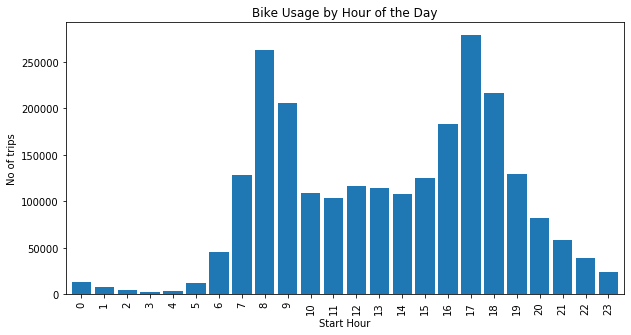

In [37]:
df_clean.start_time.dt.hour.value_counts().sort_index().plot(kind='bar',figsize=(10,5),width=0.85);
plt.ylabel('No of trips')
plt.xlabel('Start Hour')
plt.title('Bike Usage by Hour of the Day');

## Bike Usage By Trip Duration
People use bikes for short trips because most of the trips duration are under 17 minutes while average trip duration is around 11 minutes represented by the vertical red line.

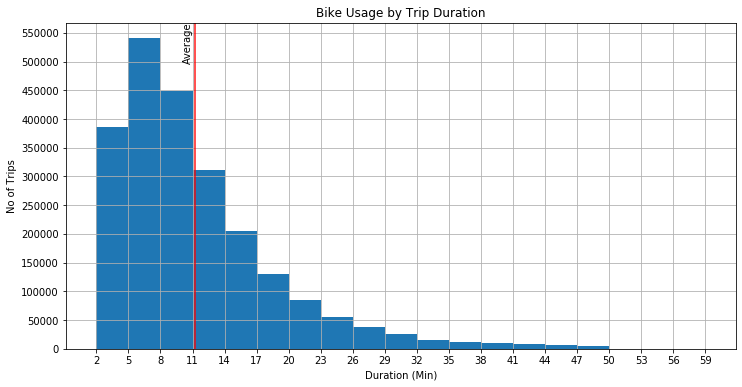

In [58]:
#df_clean.insert(1,'duration_min',df_clean.duration_sec/60) #Converting durations from seconds to minutes.
#plt.subplots()
bins = np.arange(2,60,3)
#print(bins)
yticks = np.arange(0,600000,50000)
df_clean[(df_clean.duration_min >= 2) & (df_clean.duration_min <= 50)].duration_min.plot(kind='hist',bins=bins,grid=True,figsize =(12,6))
plt.xticks(bins);
plt.yticks(yticks)
plt.xlabel('Duration (Min)')
plt.ylabel('No of Trips')
plt.title('Bike Usage by Trip Duration');
plt.axvline(11.272,color='red',alpha=0.9);
plt.text(10.1,500000,'Average',rotation=90);

## User Types and Their Usage
Most of the users are subscriber (Member) almost 20 lacs. Customers (Causal) are around 4 lacs.

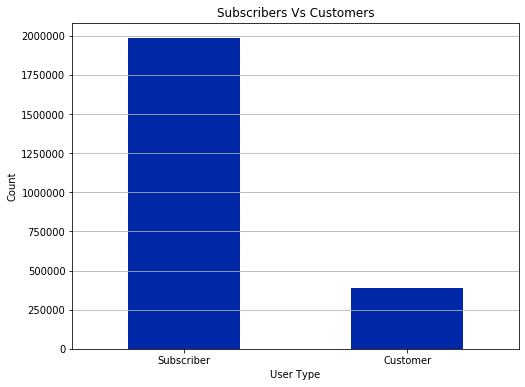

In [61]:
df_clean.user_type.value_counts().plot(kind='bar',figsize=(8,6),color='#0027A8')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Subscribers Vs Customers');

Subscribers tend to use more bikes than customers on every day of the week. On weekends, there is a significant drop in the volume of subscribers but slight increase in the volume of customers.

In [63]:
df_clean['day_name'] = df_clean.start_time.dt.day_name()
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_clean['day_name'] = pd.Categorical(df_clean['day_name'],days,ordered=True)

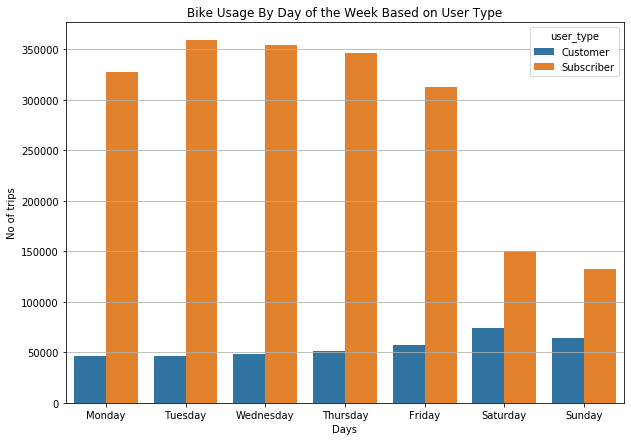

In [64]:
plt.subplots(figsize=(10,7))
sb.countplot(data=df_clean, x='day_name',hue='user_type');
plt.xticks(rotation = 0);
plt.xlabel('Days')
plt.ylabel('No of trips')
plt.title('Bike Usage By Day of the Week Based on User Type');
plt.grid(axis='y')

As we have seen previously, there are two peaks, one at around 8 AM and second at around 5 PM, Both of these belong to the subscribers group. This means, Subsribers tend to use more bikes for commuting to office. On the other hand, Customers usage is more in the afternoon from 12 PM till the evening 6 PM and there is not much difference in the usage during these hours.

In [65]:
df_clean['start_hour'] = df_clean.start_time.dt.hour

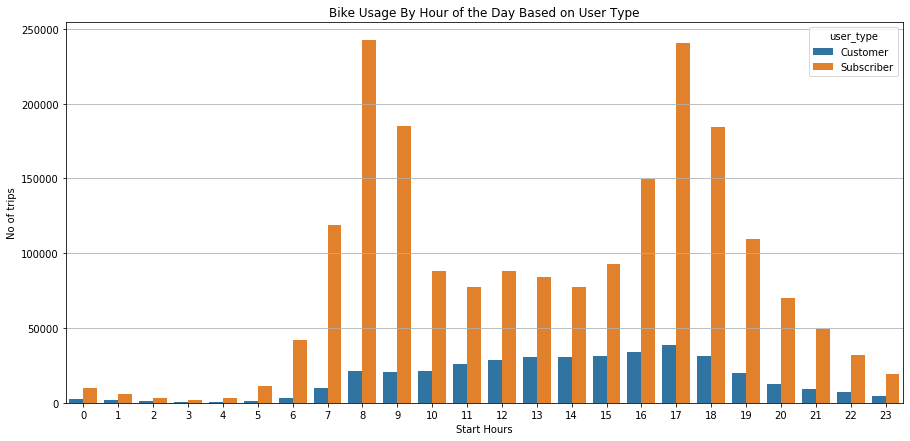

In [66]:
plt.subplots(figsize=(15,7))
sb.countplot(data=df_clean, x='start_hour',hue='user_type');
plt.xticks(rotation = 0);
plt.xlabel('Start Hours')
plt.ylabel('No of trips')
plt.title('Bike Usage By Hour of the Day Based on User Type');
plt.grid(axis='y')

## Trip Duration Based on User Type
Most of the subscribers tend to ride bikes for shorter duration around 6 to 12 minutes While there is a much greater variations in rides of customer. We can also see, For longer trip durations (above 30 minutes), Customers ride more than the subscribers.

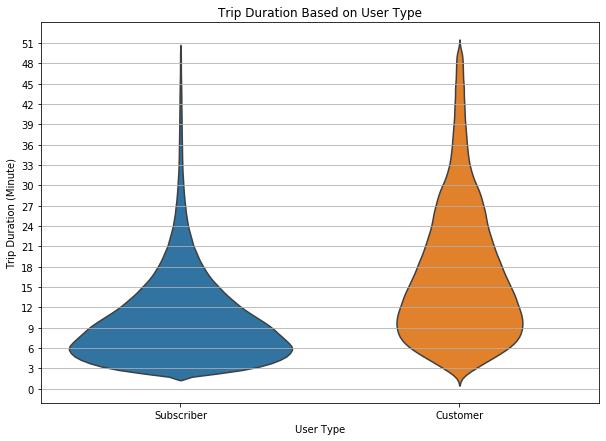

In [67]:
plt.subplots(figsize=(10,7))
sb.violinplot(data=df_clean[(df_clean.duration_min >= 2) & (df_clean.duration_min <= 50)], x='user_type',y='duration_min',inner=None);
plt.yticks(np.arange(0,52,3));
plt.xlabel('User Type');
plt.ylabel('Trip Duration (Minute)');
plt.title('Trip Duration Based on User Type');
plt.grid(axis='y')

Heatmap for subscribers shows usage at around 8-10 AM and 4-6 PM with short trip durations while heatmap for the customers depict most usage at around 4-6 PM. Furthermore, we can also see subscribers take short trips while customers take short as well as long trips.

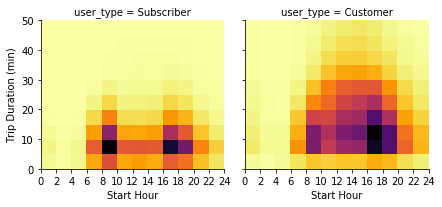

In [84]:
subset_df = df_clean[(df_clean.duration_min >= 2) & (df_clean.duration_min <= 50)]
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color');
    bins_x = np.arange(0, subset_df['start_hour'].max()+2, 2);
    bins_y = np.arange(0, subset_df['duration_min'].max()+5, 5);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.xticks(np.arange(0, subset_df['start_hour'].max()+2, 2))

g = sb.FacetGrid(data = subset_df, col = 'user_type', col_wrap = 3, height = 3);
g.map(hist2dgrid, 'start_hour', 'duration_min', color = 'inferno_r');
g.set_xlabels('Start Hour');
g.set_ylabels('Trip Duration (min)');  

## Popular Start Stations (Top 20) Based on User Type
Overall, We can see all most popular (top 20) start stations serve more subscribers rather than customers. On the other hand, Start stations "The Embarcadero at Sansome St" and "San Francisco Ferry Building (Harry Bridges Plaza)" serve comparatively more customers than other start stations.

In [68]:
#Popular Start Stations (top 20) based on user type.
popular_start_stations = df_clean.start_station_name.value_counts().iloc[:20].sort_values().index
#print(popular_start_stations)
subset_df = df_clean[df_clean.start_station_name.isin(popular_start_stations)]

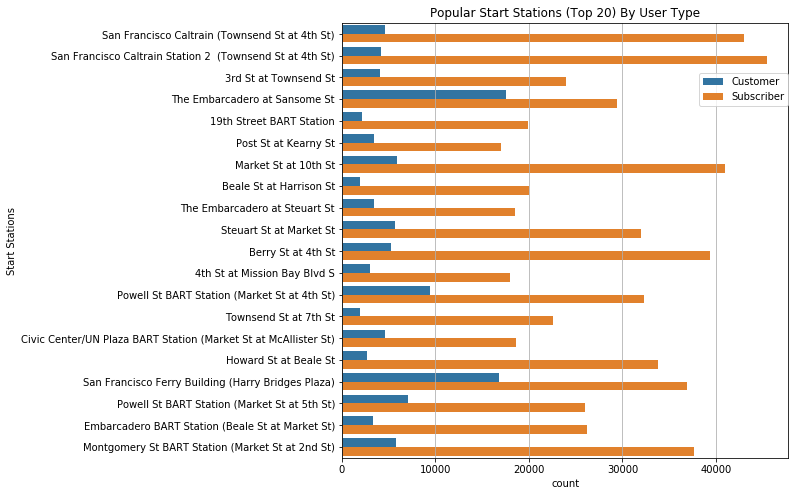

In [71]:
plt.subplots(figsize=(8,8))
sb.countplot(data=subset_df, y='start_station_name',hue='user_type');
plt.legend(loc=(0.8,0.81));
plt.grid(axis='x')
plt.ylabel('Start Stations')
plt.title('Popular Start Stations (Top 20) By User Type');

Start stations "San Francisco Caltrain (Townsend St at 4th St)", "San Francisco Caltrain Station 2 (Townsend St at 4th St)","Steuart St at Market St", "Berry St at 4th St","Howard St at Beale St" and "San Francisco Ferry Building (Harry Bridges Plaza)" seem to serve more users in the morning 8 AM as compared to other start stations. We can infer, most of the users using bikes for commuting to office purpose must be living somewhere near these start stations.

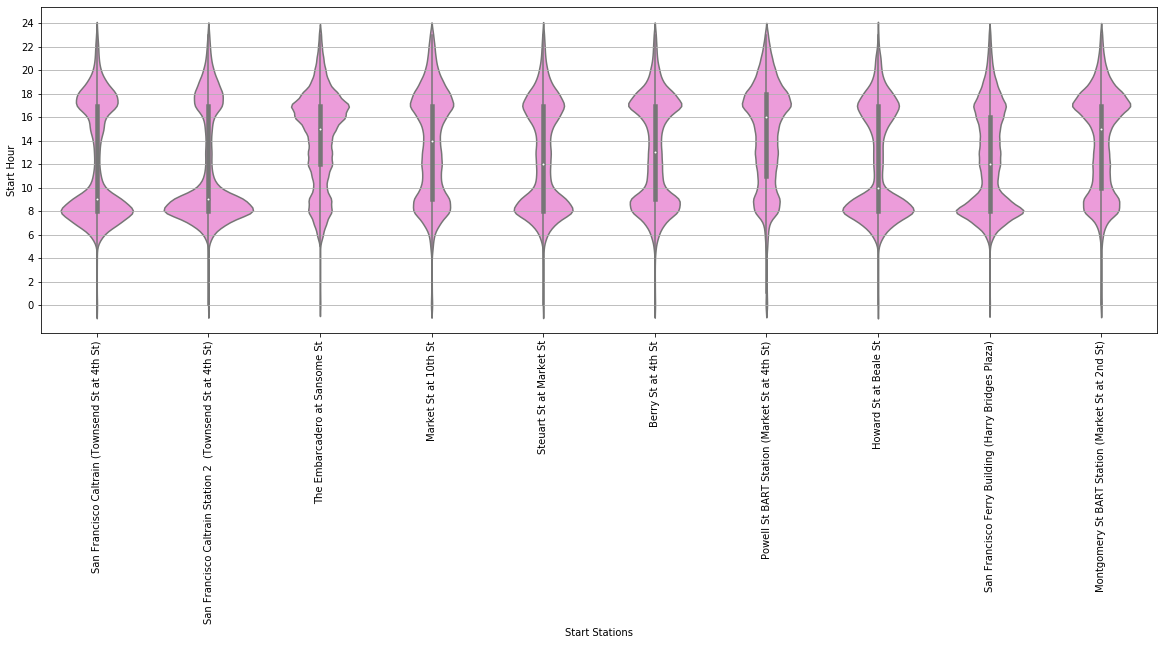

In [80]:
popular_start_stations = df_clean.start_station_name.value_counts().iloc[:10].sort_values().index
#print(popular_start_stations)
subset_df = df_clean[df_clean.start_station_name.isin(popular_start_stations)]
plt.subplots(figsize=(20,6))
sb.violinplot(data=subset_df, x='start_station_name', y='start_hour',color='#F98FE2')
plt.xticks(rotation=90);
plt.yticks(np.arange(0,25,2));
plt.grid(axis='y')
plt.ylabel('Start Hour')
plt.xlabel('Start Stations');


Similiary we can infer most people using bikes have offices located near to the following end stations.
San Francisco Caltrain (Townsend St at 4th St)
San Francisco Ferry Building (Harry Bridges Plaza)
San Francisco Caltrain Station 2 (Townsend St at 4th St)

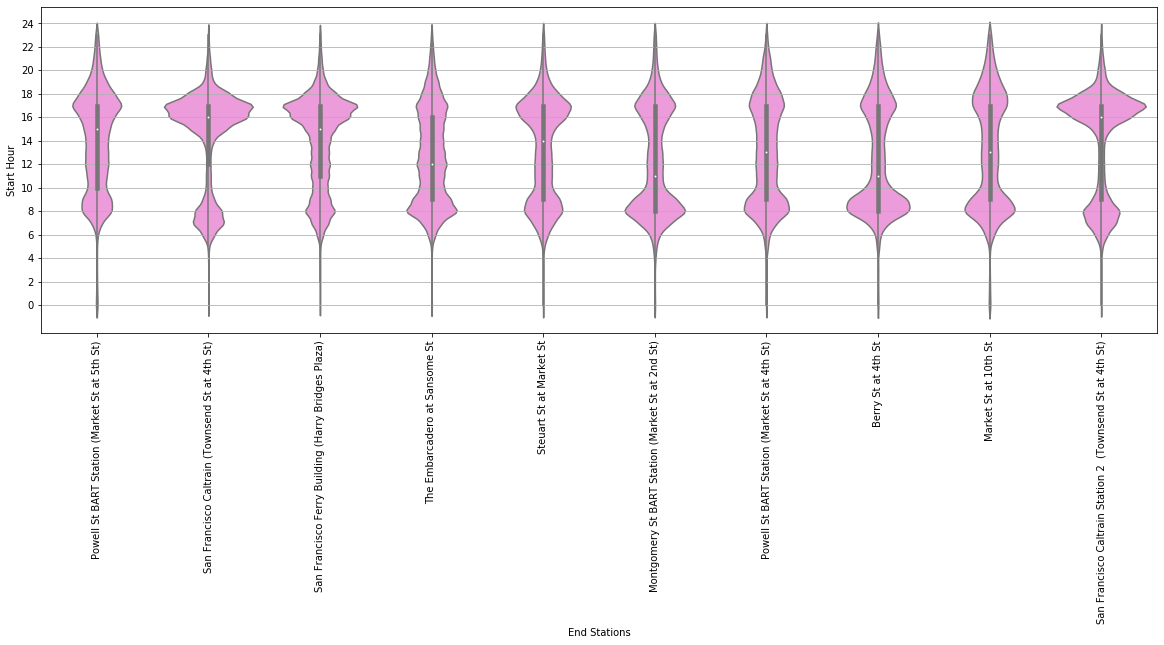

In [82]:
popular_end_stations = df_clean.end_station_name.value_counts().iloc[:10].sort_values().index
#print(popular_end_stations)
subset_df = df_clean[df_clean.end_station_name.isin(popular_end_stations)]
plt.subplots(figsize=(20,6))
sb.violinplot(data=subset_df, x='end_station_name', y='start_hour',color='#F98FE2')
plt.xticks(rotation=90);
plt.yticks(np.arange(0,25,2));
plt.grid(axis='y')
plt.ylabel('Start Hour')
plt.xlabel('End Stations');